# Shallow model explainability with SHAP values

In [10]:
# import torch
import numpy as np
import pandas as pd
# import shap
import h5py
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
from brain_age_prediction import models, utils, viz
importlib.reload(utils)
importlib.reload(viz)

<module 'brain_age_prediction.viz' from '/home/laurar/brain_age_1D-CNN/src/brain_age_prediction/viz.py'>

In [2]:
# paths to best model checkpoints
shallow_model_path = 'lightweight-brain-age-prediction/umd5tlvz/checkpoints/epoch=57-step=13108.ckpt'
# paths to saved predictions
save_dir = '/ritter/share/projects/laura_riedel_thesis/shap_values.hdf5'

# get brain area / network names
network_names = utils.get_network_names()
# load colour maps
network_colour_map = viz.get_colour_map('network')
area_colour_map = viz.get_colour_map('area')

In [3]:
%%time
# load predictions
with h5py.File(save_dir, 'r') as f:
    shallow_shap = f['shallow']['full'][()]
print('Shape of SHAP values:', shallow_shap.shape)

# # load shallow model
# shallow_model = models.shallow1DCNN.load_from_checkpoint(shallow_model_path)
# shallow_model.eval()

Shape of SHAP values: (5000, 100, 490)
CPU times: user 9.24 s, sys: 2.03 s, total: 11.3 s
Wall time: 16.8 s


Create dataframe to sort values according to their contribution

In [4]:
shallow_mean_area = np.mean(np.mean(np.abs(shallow_shap),axis=2),axis=0)

shallow_shap_df = pd.DataFrame(network_names, columns=['parcellation'])
shallow_shap_df = utils.add_specific_network_columns(shallow_shap_df, insert_start=1)
shallow_shap_df['mean SHAP'] = shallow_mean_area

In [8]:
# 20 highest mean SHAP values
shallow_shap_df.sort_values(by=['mean SHAP'], ascending=False).head(20)

parcellation hemisphere      network         area  \
64                 RH_SomMot_7         RH       SomMot  full SomMot   
62                 RH_SomMot_5         RH       SomMot  full SomMot   
14                 LH_SomMot_6         LH       SomMot  full SomMot   
72           RH_DorsAttn_FEF_1         RH     DorsAttn          FEF   
18          LH_DorsAttn_Post_4         LH     DorsAttn         Post   
59                 RH_SomMot_2         RH       SomMot  full SomMot   
25  LH_SalVentAttn_FrOperIns_2         LH  SalVentAttn    FrOperIns   
78             RH_Limbic_OFC_1         RH       Limbic          OFC   
38           LH_Default_Temp_2         LH      Default         Temp   
35              LH_Cont_pCun_1         LH         Cont         pCun   
4                     LH_Vis_5         LH          Vis     full Vis   
80               RH_Cont_Par_1         RH         Cont     Par Cont   
86              RH_Cont_Cing_1         RH         Cont         Cing   
10                 LH_SomMot_2         LH       SomMot  full SomMot   
36              LH_Cont_Cing_1         LH         Cont         Cing   
24  LH_SalVentAttn_FrOperIns_1         LH  SalVentAttn    FrOperIns   
98        RH_Default_pCunPCC_1         RH      Default      pCunPCC   
91           RH_Default_Temp_2         RH      Default         Temp   
13                 LH_SomMot_5         LH       SomMot  full SomMot   
31        LH_Limbic_TempPole_1         LH       Limbic     TempPole   

    mean SHAP  max SHAP  
64   0.013933  0.065509  
62   0.012231  0.069156  
14   0.011965  0.072291  
72   0.011509  0.064178  
18   0.011238  0.066714  
59   0.011079  0.079549  
25   0.010921  0.063697  
78   0.010640  0.061396  
38   0.010587  0.055274  
35   0.010302  0.059691  
4    0.009952  0.055947  
80   0.009817  0.051381  
86   0.009738  0.060442  
10   0.009503  0.077339  
36   0.009500  0.052758  
24   0.008942  0.066681  
98   0.008924  0.057923  
91   0.008137  0.051745  
13   0.008107  0.050592  
31   0.007742  0.055689

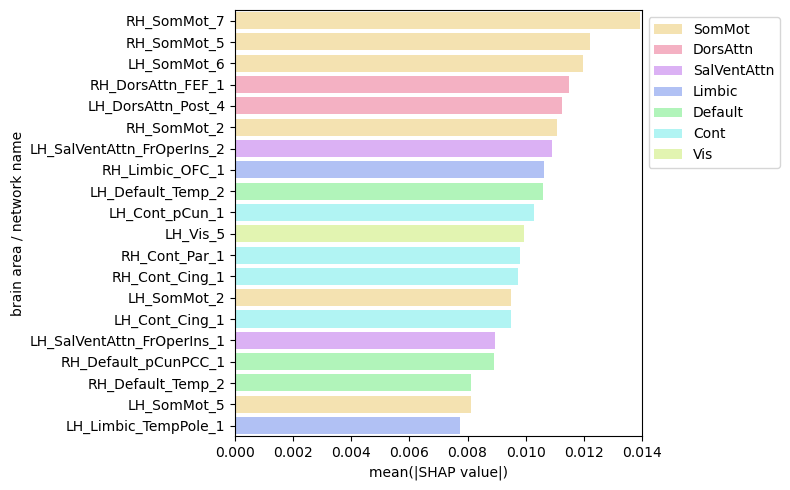

In [49]:
subset = shallow_shap_df.sort_values(by=['mean SHAP'], ascending=False)[:20].copy()
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=subset,
            x='mean SHAP',
            y='parcellation',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean(|SHAP value|)',
       ylabel='brain area / network name',
       title='20 highest ranking attributions',
       )
ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
ax.set_xlim(0,0.014)
fig.tight_layout()
# fig.savefig('../../viz/SHAP_global_20highest_nw_shallow.png')
fig.show()

## Create long table for easier visualisations

In [4]:
shap_df, area_mean_df = utils.create_long_df(shallow_shap)

In [28]:
shap_df

id          parcellation hemisphere  network      area      shap  \
0       1084205              LH_Vis_1         LH      Vis  full Vis  0.003675   
1       1364685              LH_Vis_1         LH      Vis  full Vis  0.004113   
2       1378042              LH_Vis_1         LH      Vis  full Vis  0.004036   
3       1243331              LH_Vis_1         LH      Vis  full Vis  0.003910   
4       1174601              LH_Vis_1         LH      Vis  full Vis  0.003574   
...         ...                   ...        ...      ...       ...       ...   
499995  1264831  RH_Default_pCunPCC_2         RH  Default   pCunPCC  0.007923   
499996  1251835  RH_Default_pCunPCC_2         RH  Default   pCunPCC  0.007755   
499997  1525394  RH_Default_pCunPCC_2         RH  Default   pCunPCC  0.007524   
499998  1238019  RH_Default_pCunPCC_2         RH  Default   pCunPCC  0.007598   
499999  1099323  RH_Default_pCunPCC_2         RH  Default   pCunPCC  0.007330   

        area weight  mean area shap  
0          1.000000        0.004334  
1          1.000000        0.004334  
2          1.000000        0.004334  
3          1.000000        0.004334  
4          1.000000        0.004334  
...             ...             ...  
499995     0.166667        0.006174  
499996     0.166667        0.006174  
499997     0.166667        0.006174  
499998     0.166667        0.006174  
499999     0.166667        0.006174  

[500000 rows x 8 columns]

In [29]:
area_mean_df

network              area  area weight  mean area shap
0           Vis          full Vis     1.000000        0.004334
1        SomMot       full SomMot     1.000000        0.007348
2      DorsAttn              Post     0.733333        0.004606
3      DorsAttn              PrCv     0.133333        0.004884
4      DorsAttn               FEF     0.133333        0.007385
5   SalVentAttn               Med     0.416667        0.004833
6   SalVentAttn         FrOperIns     0.250000        0.008255
7   SalVentAttn        TempOccPar     0.166667        0.004113
8   SalVentAttn           ParOper     0.083333        0.003342
9   SalVentAttn  PFCl SalVentAttn     0.083333        0.004459
10       Limbic          TempPole     0.600000        0.005570
11       Limbic               OFC     0.400000        0.008526
12         Cont         PFCl Cont     0.384615        0.003939
13         Cont          Par Cont     0.230769        0.005838
14         Cont              pCun     0.153846        0.007437
15         Cont              Cing     0.153846        0.009619
16         Cont             PFCmp     0.076923        0.004614
17      Default               PFC     0.291667        0.004584
18      Default              Temp     0.208333        0.006252
19      Default           pCunPCC     0.166667        0.006174
20      Default       Par Default     0.125000        0.004783
21      Default          PFCdPFCm     0.125000        0.005204
22      Default              PFCv     0.083333        0.003995

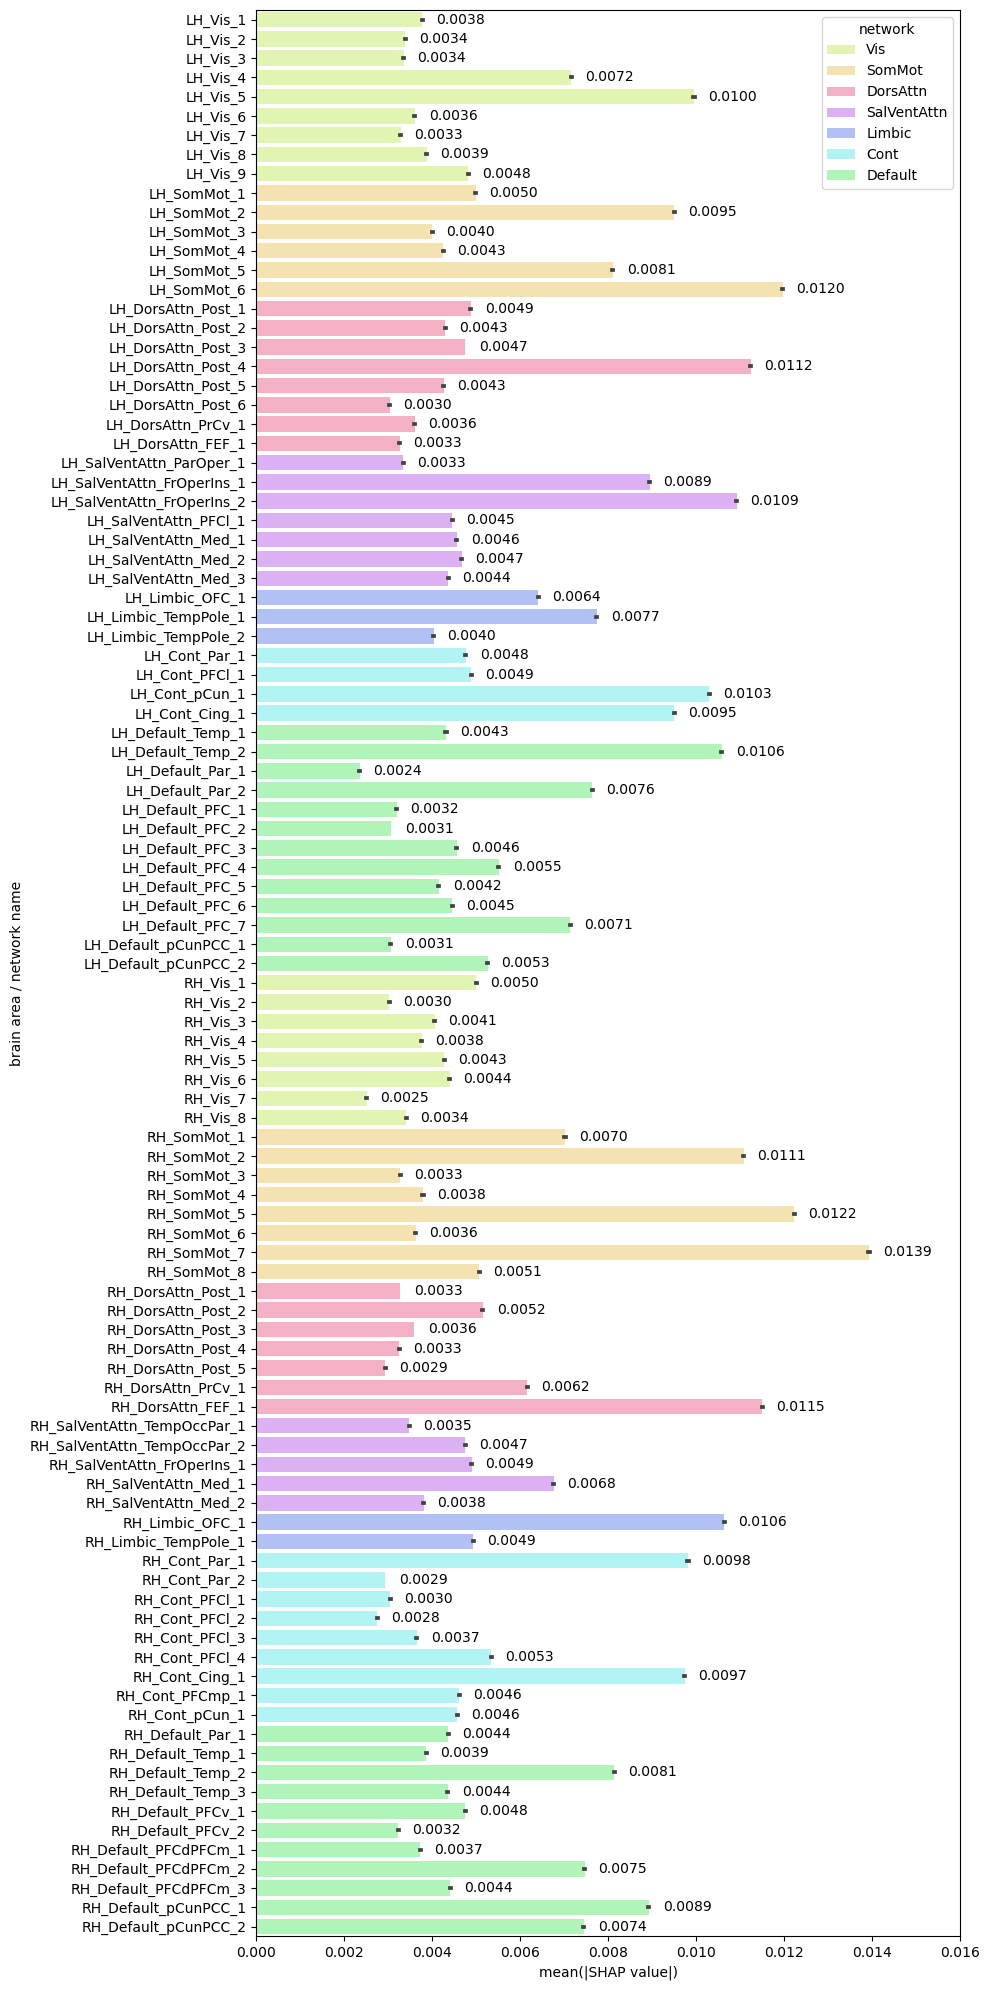

In [5]:
fig, ax = plt.subplots(figsize=(10,20))
ax = sns.barplot(data=shap_df,
            x='shap',
            y='parcellation',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean(|SHAP value|)',
       ylabel='brain area / network name')
for container in ax.containers:
    ax.bar_label(container, padding=10, fmt='%.4f')
# ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
ax.set_xlim(0,0.016)
fig.tight_layout()
# fig.savefig('../../viz/SHAP_global_all_nw_shallow.png')
fig.show()

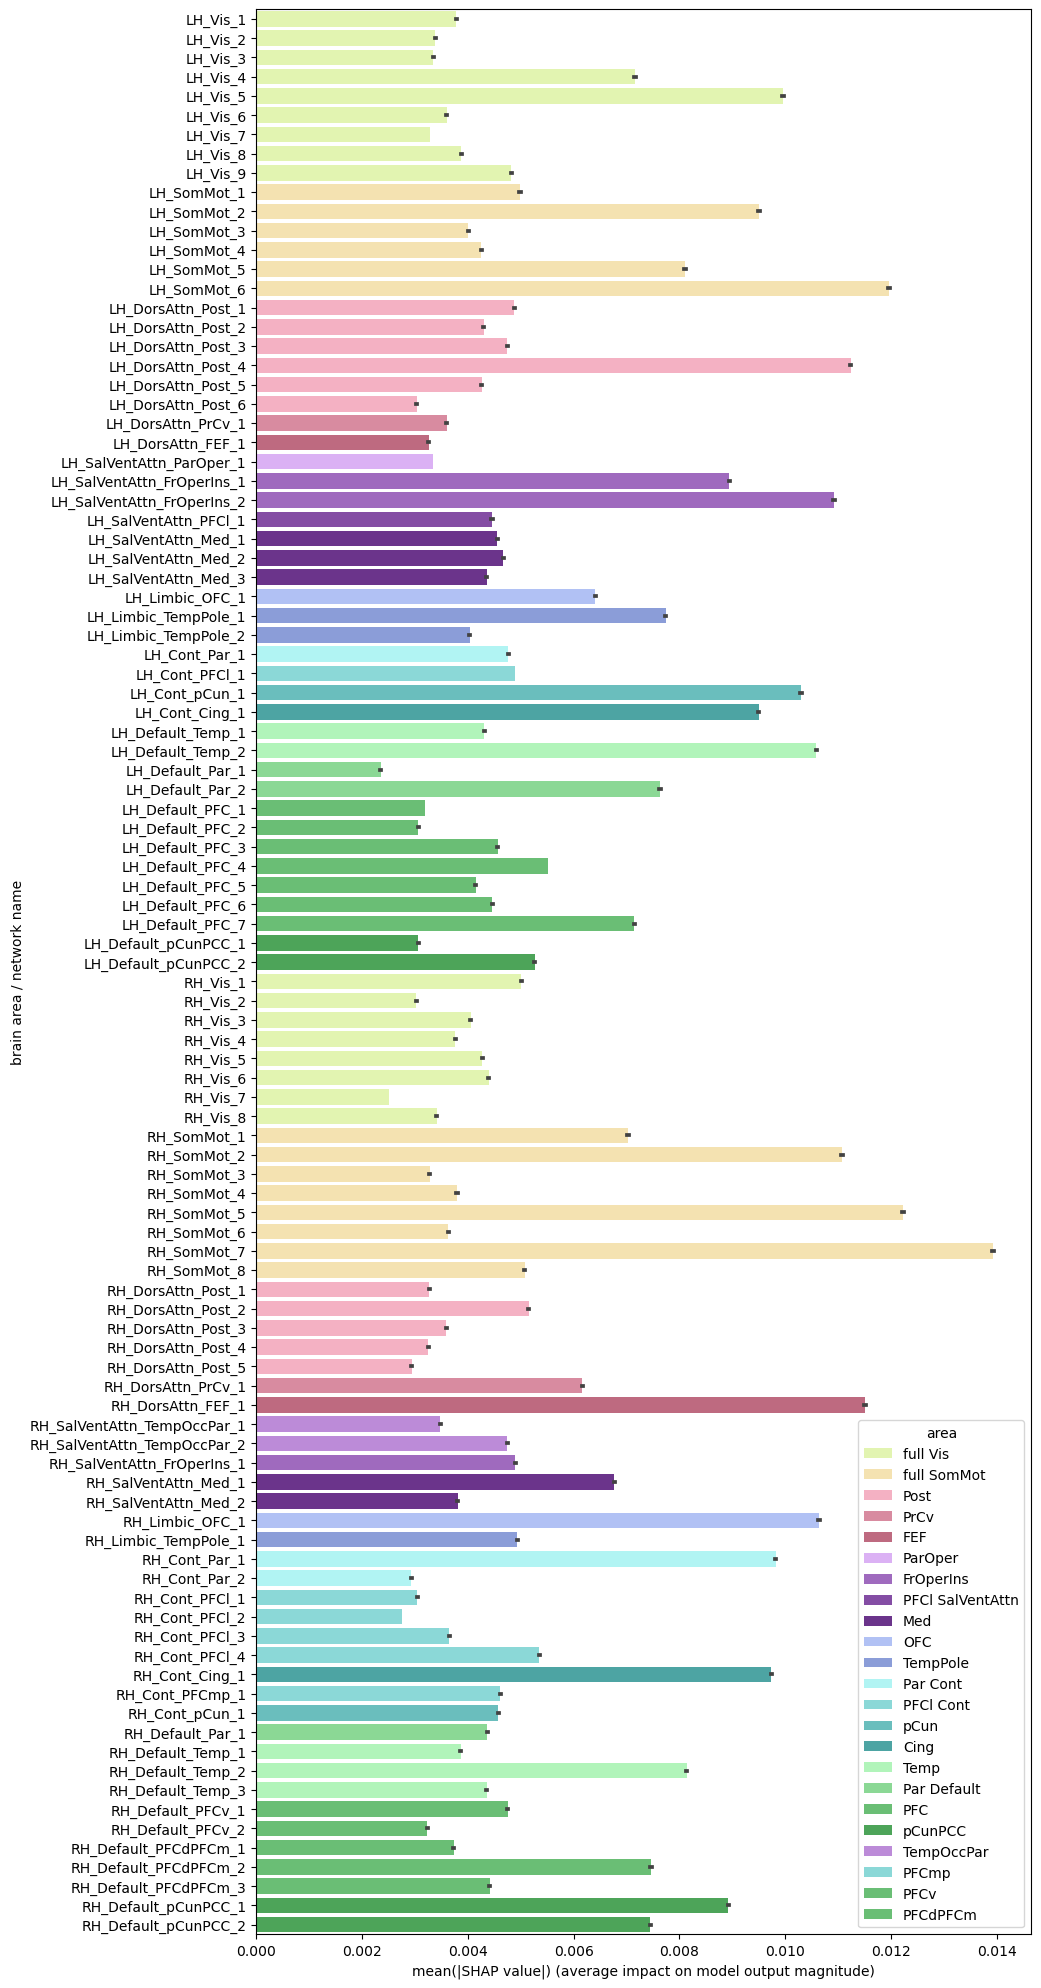

In [31]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=shap_df,
            x='shap',
            y='parcellation',
            orient='h',
            hue='area',
            palette=area_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean(|SHAP value|) (average impact on model output magnitude)',
       ylabel='brain area / network name')
plt.show()

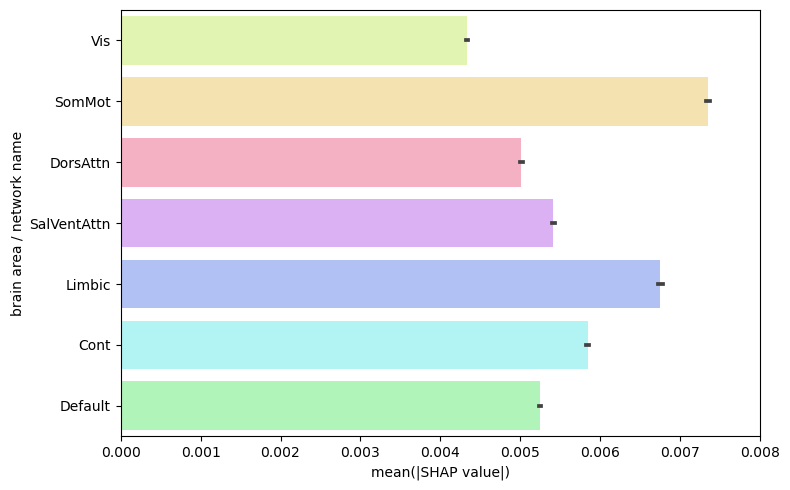

In [6]:
# "raw" network mean
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=shap_df,
            x='shap',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean(|SHAP value|)',
       ylabel='brain area / network name')
ax.legend_.remove()
ax.set_xlim(0,0.008)
fig.tight_layout()
fig.show()

In [7]:
weighted_networks_df = utils.get_weighted_network_average(shap_df)
weighted_networks_df

network  weighted mean
0          Vis       0.004334
1       SomMot       0.007348
2     DorsAttn       0.004701
3  SalVentAttn       0.005484
4       Limbic       0.006479
5         Cont       0.005206
6      Default       0.005228

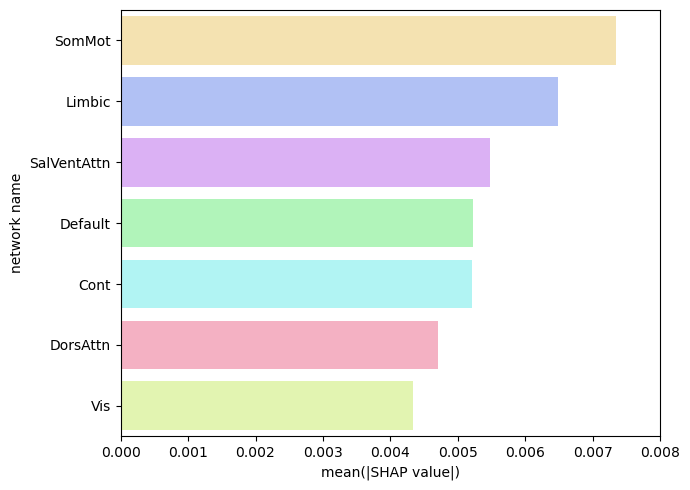

In [8]:
# weighted network mean
sort_order = weighted_networks_df.sort_values('weighted mean', ascending=False).network
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=weighted_networks_df,
            x='weighted mean',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            order=sort_order,
            ax=ax)
ax.set(xlabel='mean(|SHAP value|)',
       ylabel='network name')
ax.legend_.remove()
ax.set_xlim(0,0.008)
fig.tight_layout()
# fig.savefig('../../viz/SHAP_global_weighted_nw_mean_shallow.png')
plt.show()

In [37]:
shap_df.loc[:,['shap','network']].groupby('network').mean()

shap
network              
Cont         0.005841
Default      0.005250
DorsAttn     0.005014
Limbic       0.006752
SalVentAttn  0.005413
SomMot       0.007348
Vis          0.004334

## Local explanations

In [40]:
young_sub = utils.get_sub_shap(shallow_shap, 1137757)
old_sub = utils.get_sub_shap(shallow_shap, 1318155)
younger_pred_sub = utils.get_sub_shap(shallow_shap, 1184162)
older_pred_sub = utils.get_sub_shap(shallow_shap, 1364474)
min_bag_diff_sub = utils.get_sub_shap(shallow_shap, 1031078)
max_bag_diff_sub = utils.get_sub_shap(shallow_shap, 1457519)

In [41]:
def simple_heatmap(data, figsize=(60,10)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(data,cmap="PuOr", center=0, square=True,
                ax=ax, xticklabels='auto', yticklabels='auto');

Show heatmaps with standardised SHAP values (per channel)

In [12]:
from scipy.stats import zscore

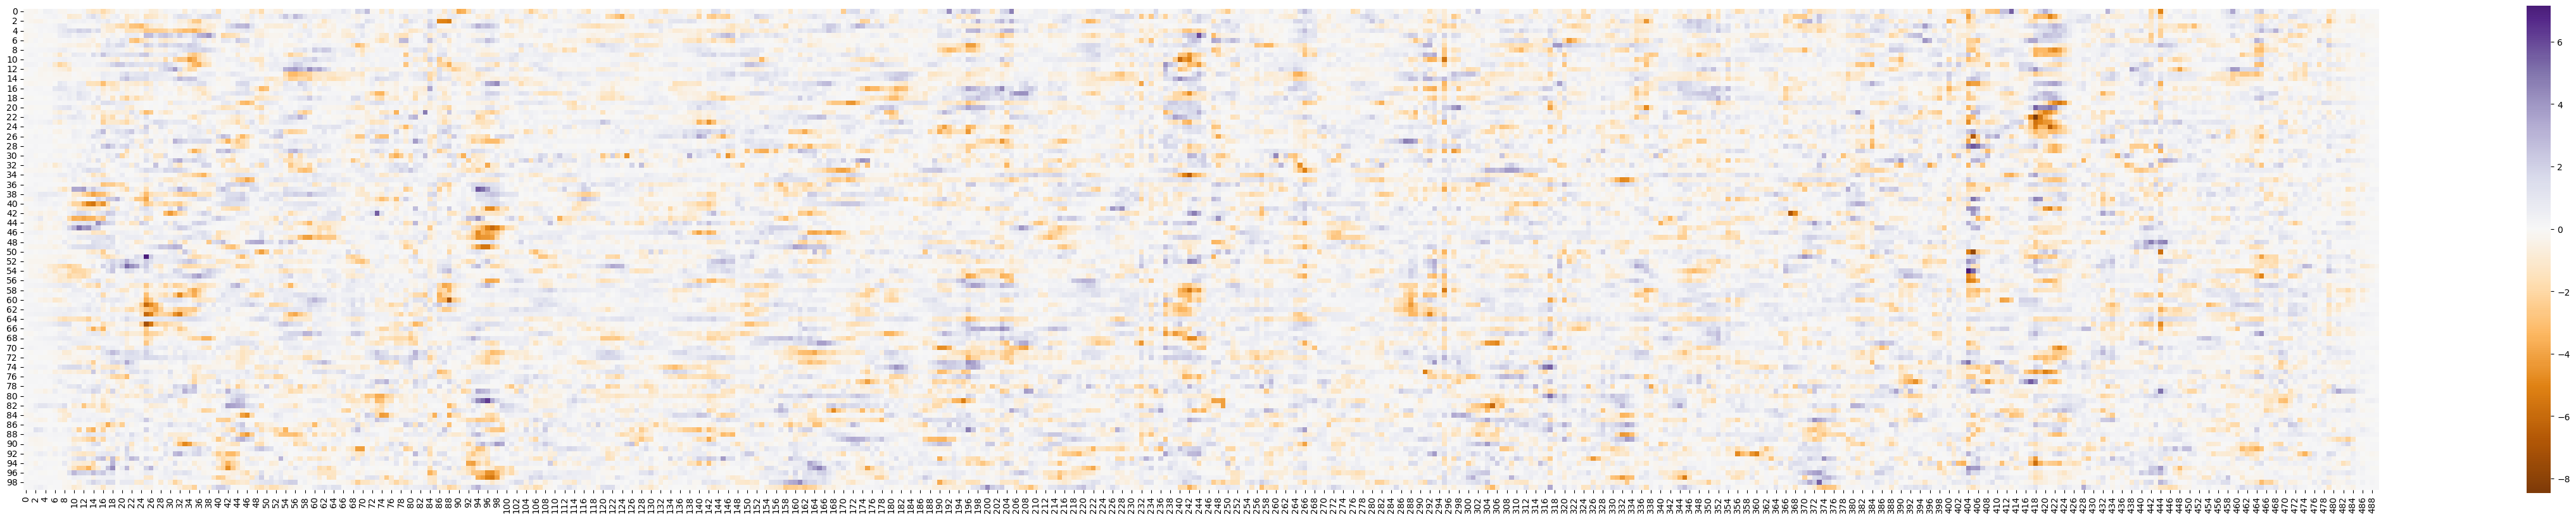

In [49]:
simple_heatmap(zscore(young_sub, axis=1), (60,10))

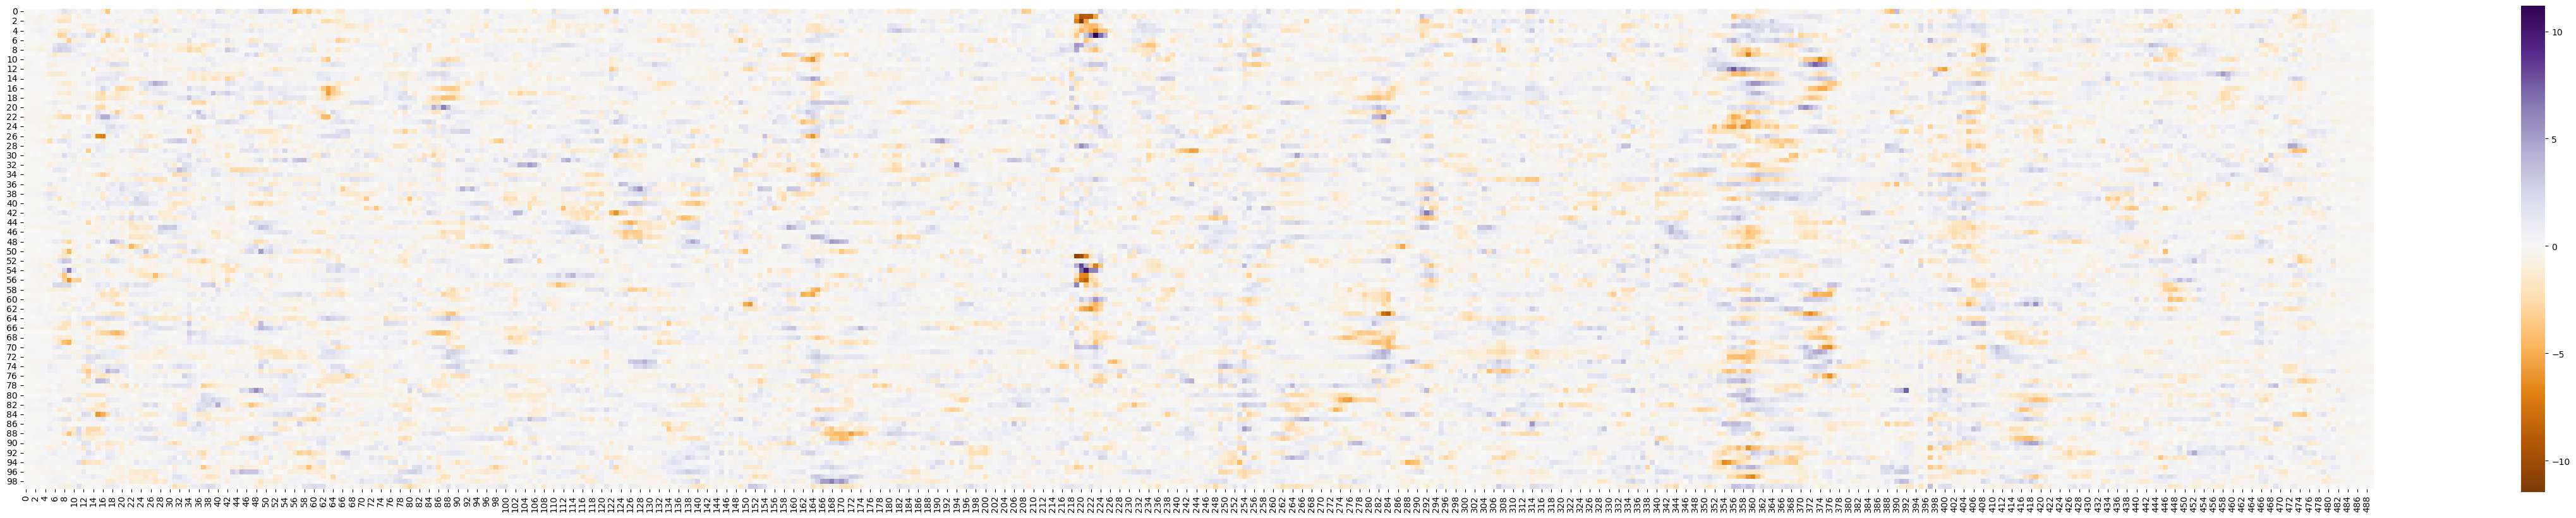

In [50]:
simple_heatmap(zscore(old_sub, axis=1), (60,10))

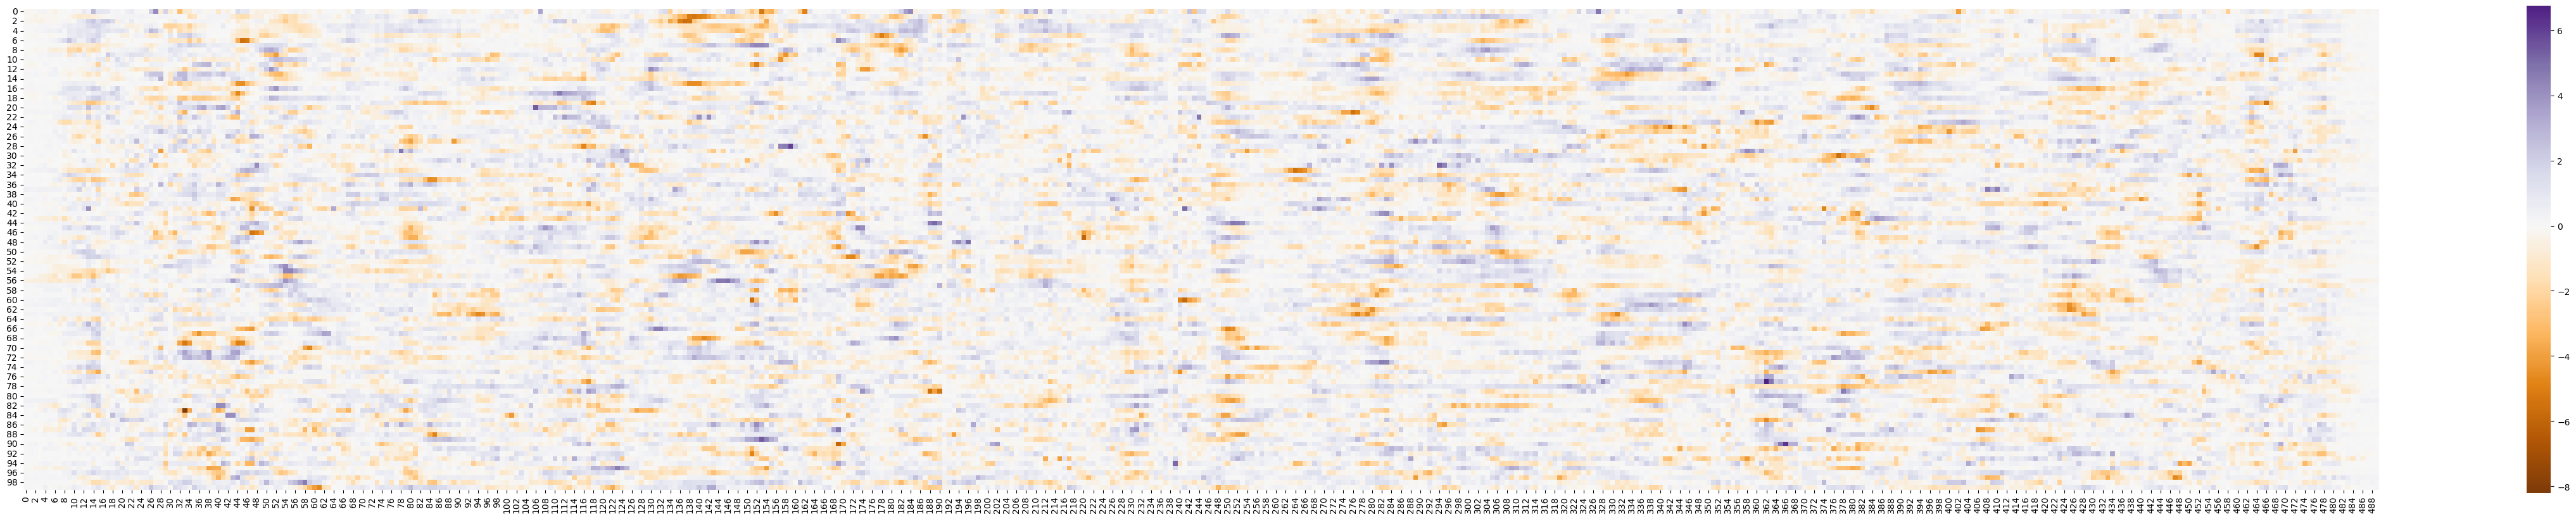

In [51]:
simple_heatmap(zscore(younger_pred_sub, axis=1), (60,10))

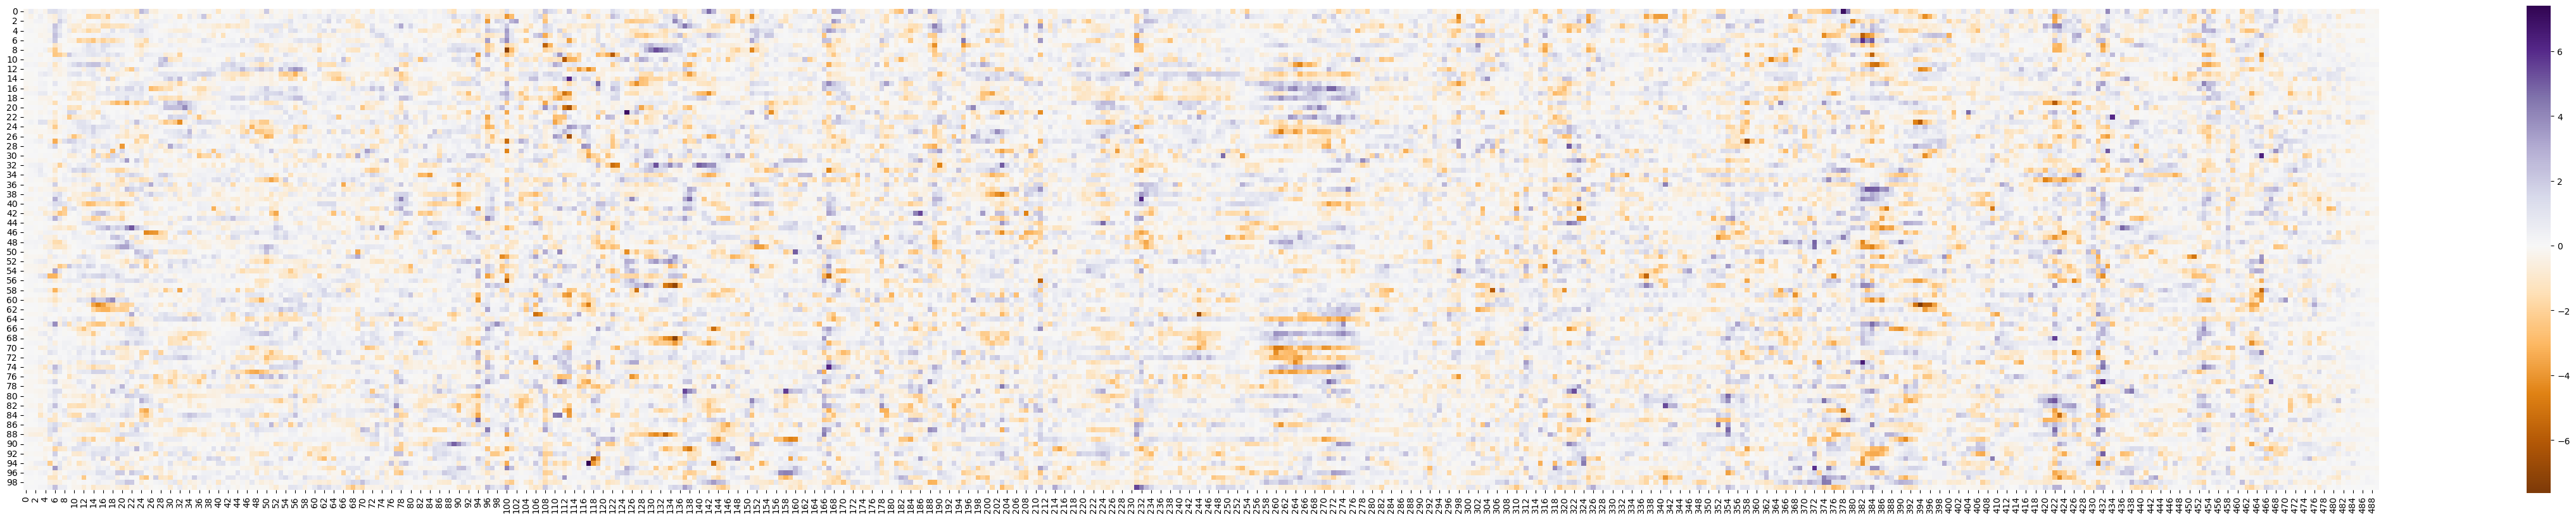

In [52]:
simple_heatmap(zscore(older_pred_sub, axis=1), (60,10))

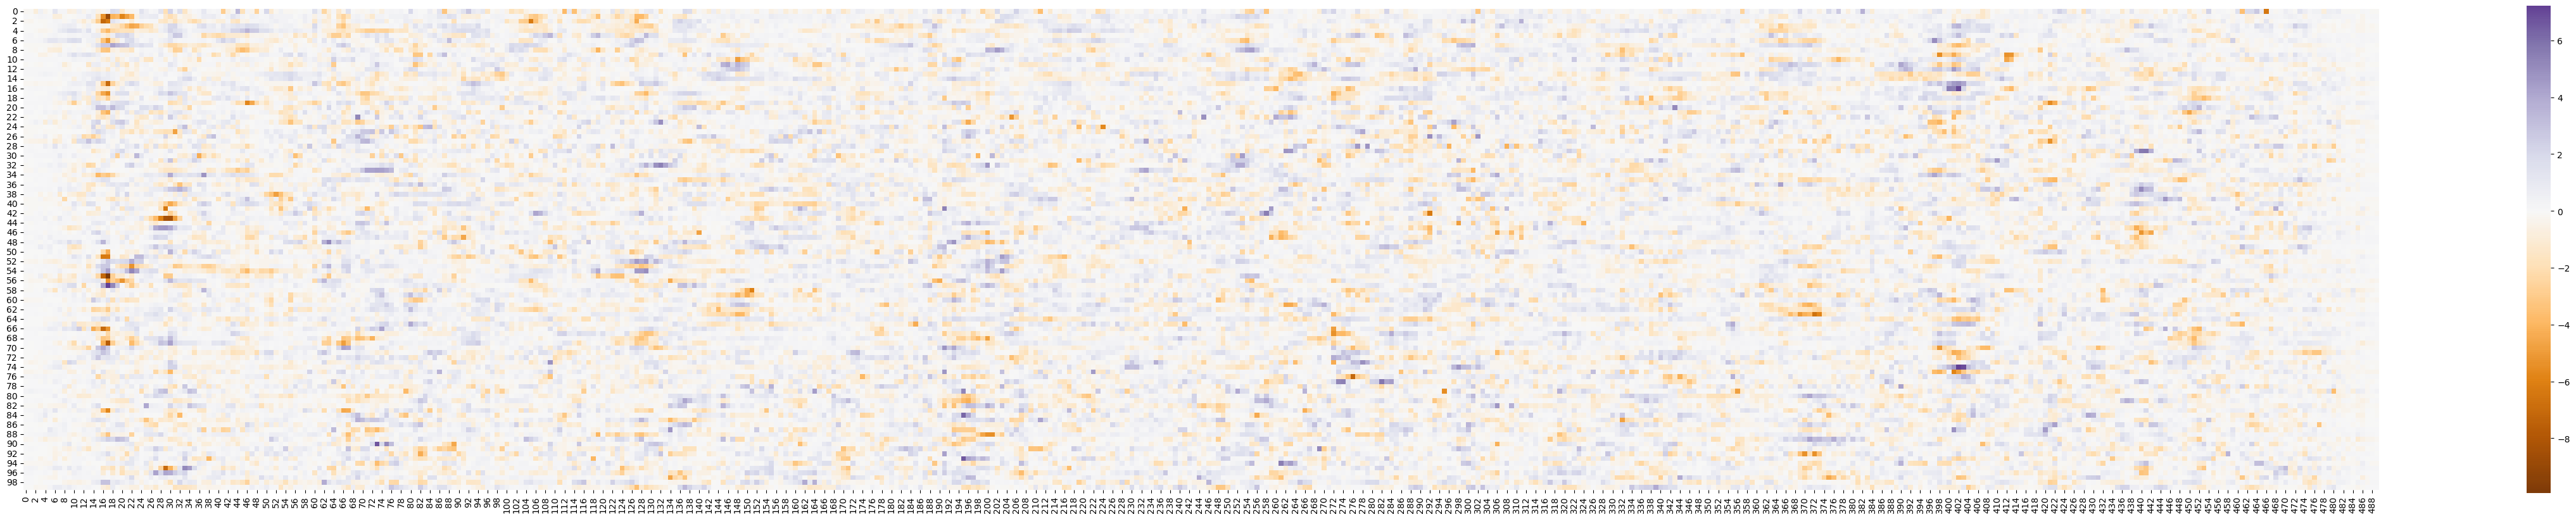

In [53]:
simple_heatmap(zscore(min_bag_diff_sub, axis=1), (60,10))

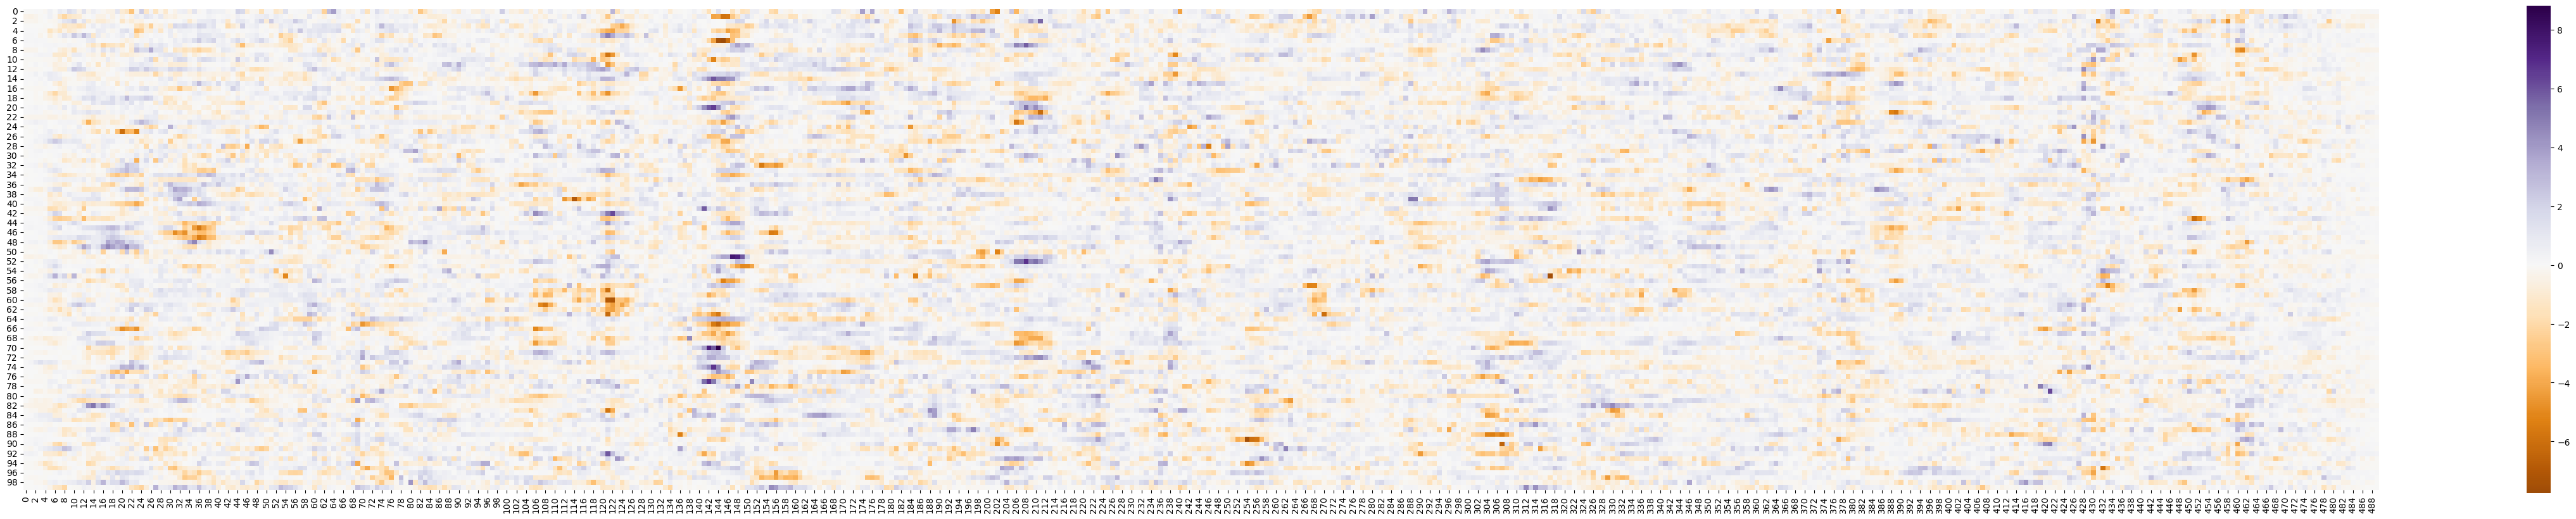

In [54]:
simple_heatmap(zscore(max_bag_diff_sub, axis=1), (60,10))

### Mean channel importance

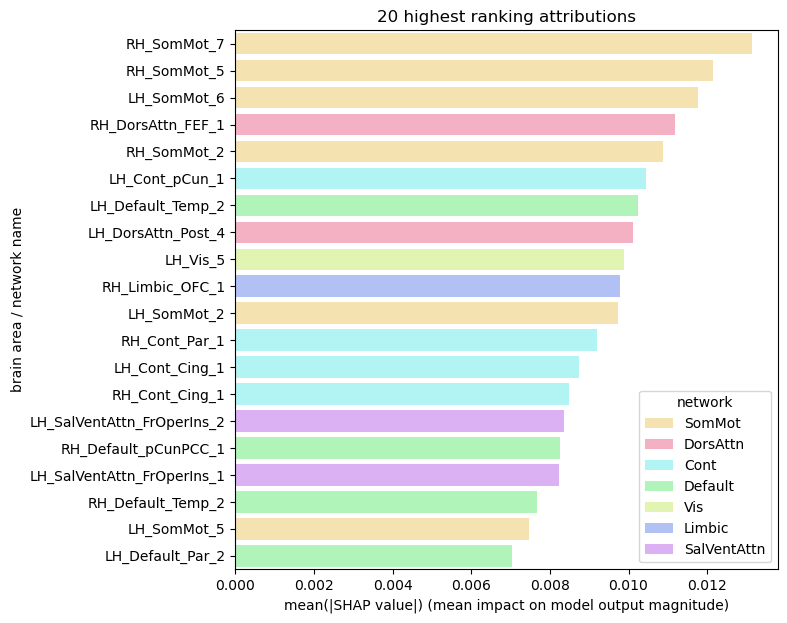

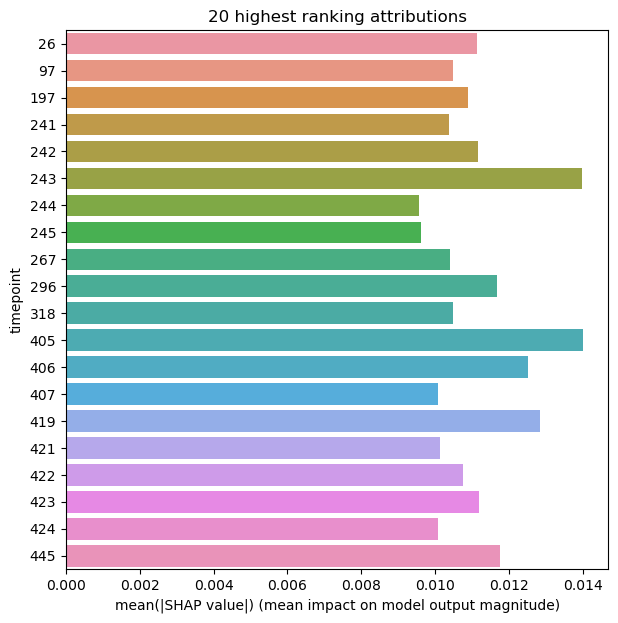

In [57]:
# young sub
viz.simple_local_explanation(young_sub, kind='parcellation')
viz.simple_local_explanation(young_sub, kind='timepoint')

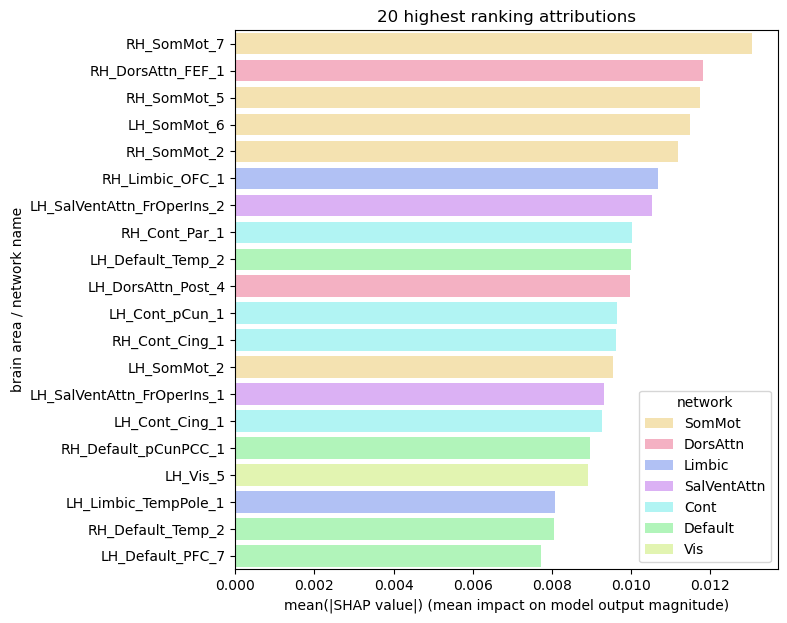

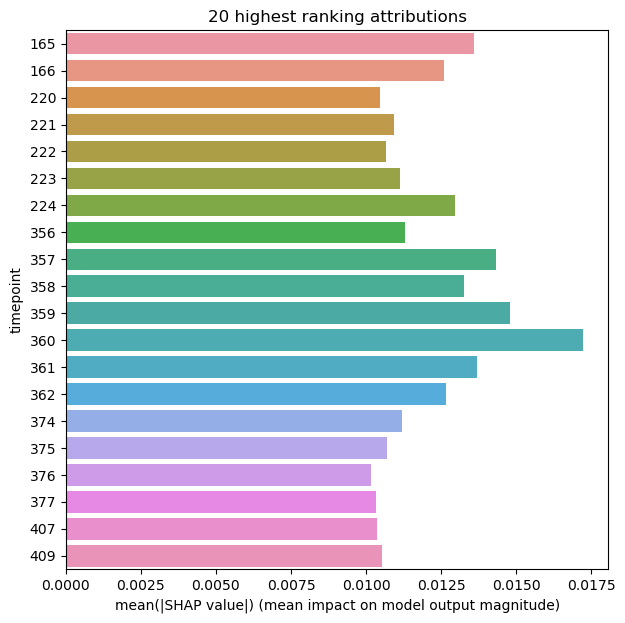

In [58]:
# old sub
viz.simple_local_explanation(old_sub, kind='parcellation')
viz.simple_local_explanation(old_sub, kind='timepoint')

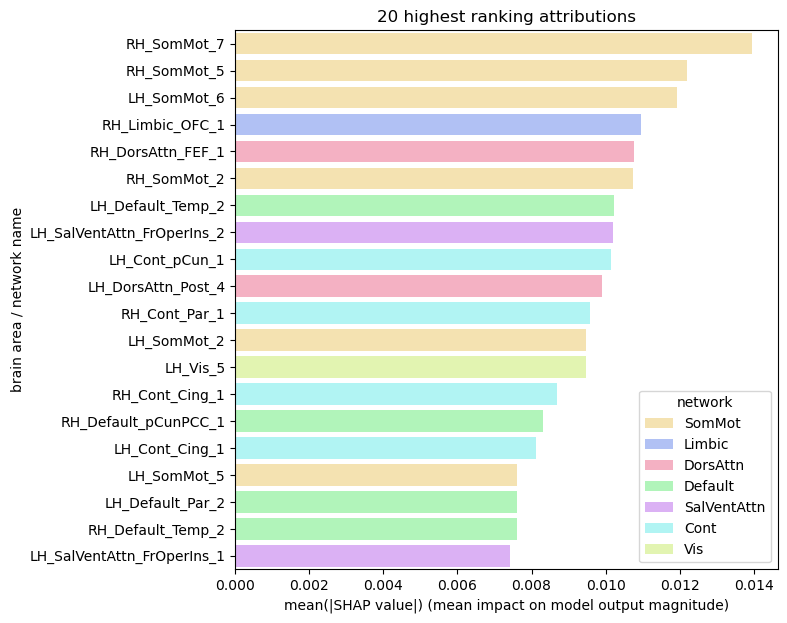

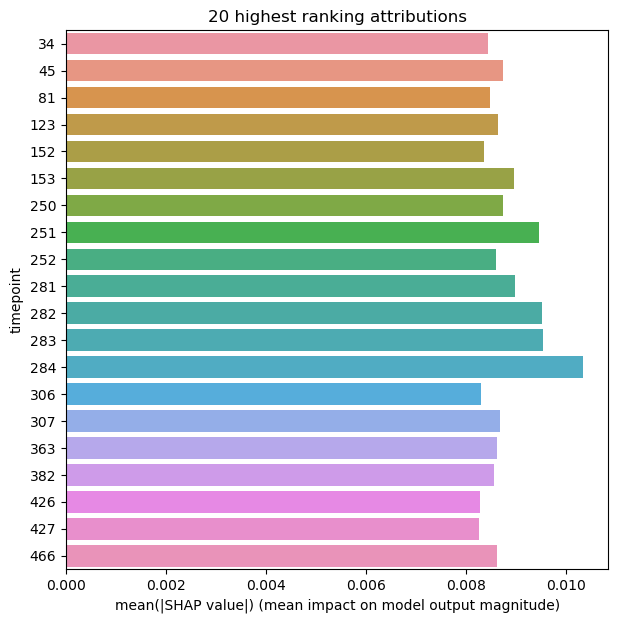

In [59]:
# younger prediction sub
viz.simple_local_explanation(younger_pred_sub, kind='parcellation')
viz.simple_local_explanation(younger_pred_sub, kind='timepoint')

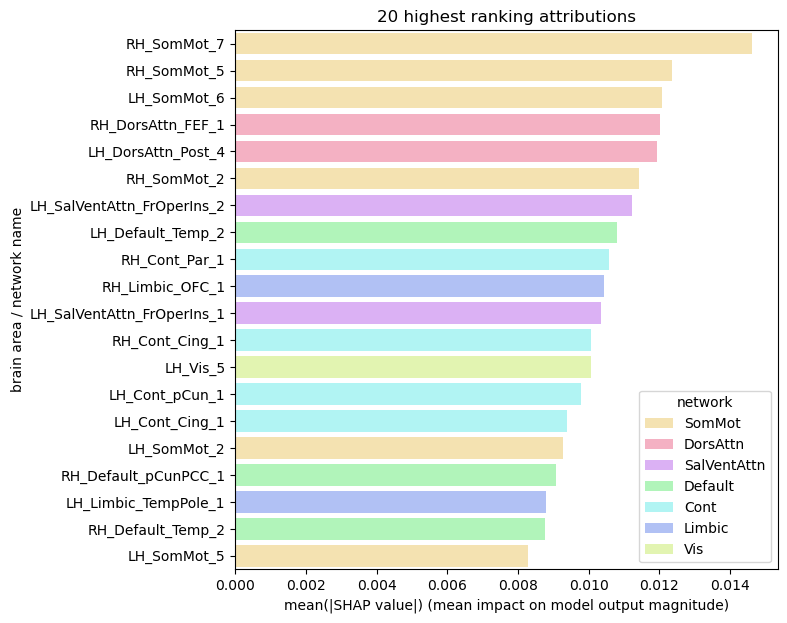

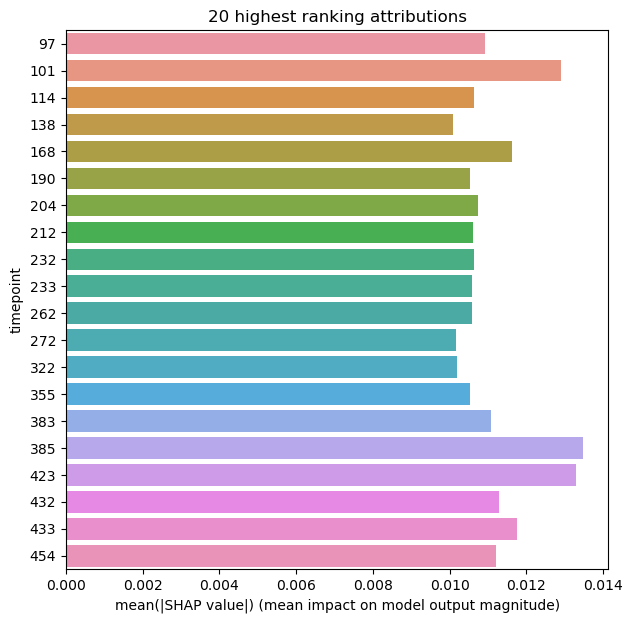

In [60]:
# older prediction sub
viz.simple_local_explanation(older_pred_sub, kind='parcellation')
viz.simple_local_explanation(older_pred_sub, kind='timepoint')

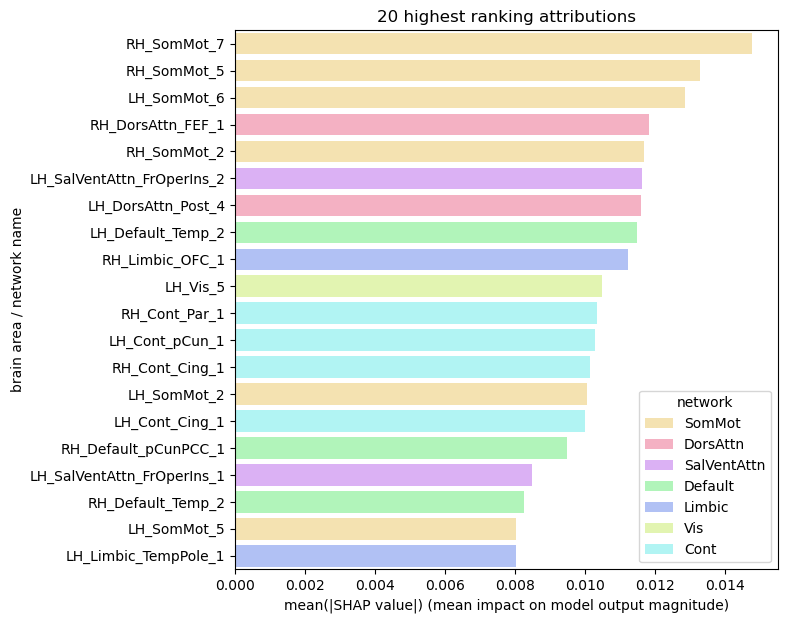

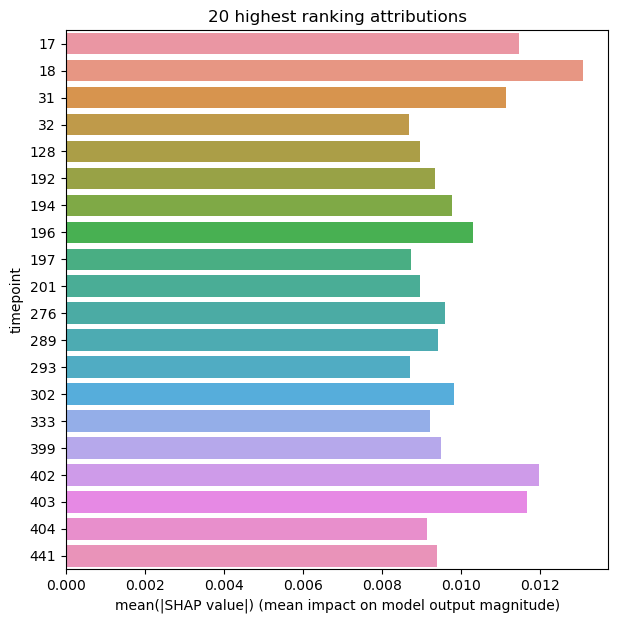

In [61]:
# minimal BAG difference sub
viz.simple_local_explanation(min_bag_diff_sub, kind='parcellation')
viz.simple_local_explanation(min_bag_diff_sub, kind='timepoint')

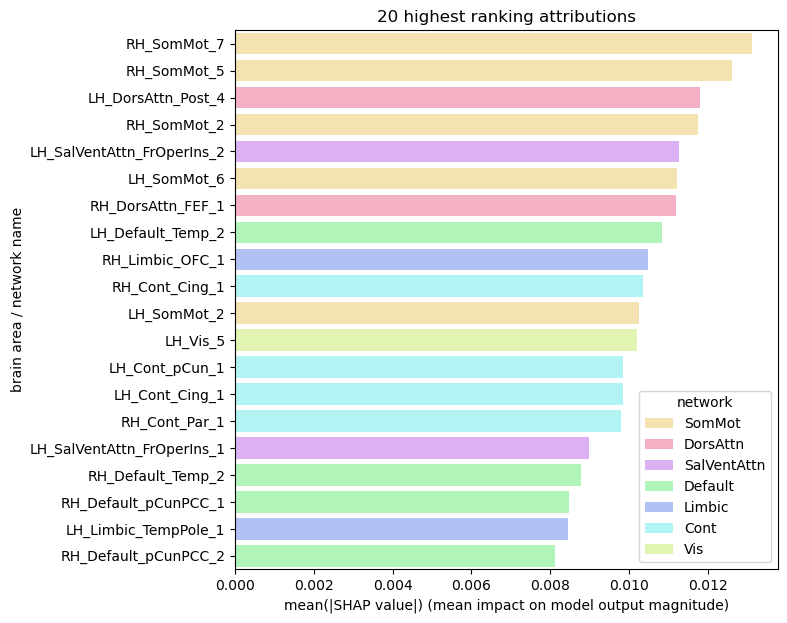

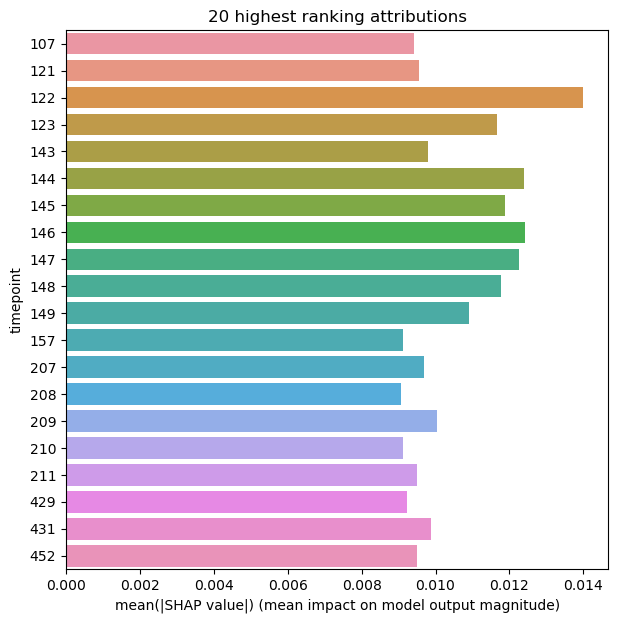

In [62]:
# maximal BAG difference sub
viz.simple_local_explanation(max_bag_diff_sub, kind='parcellation')
viz.simple_local_explanation(max_bag_diff_sub, kind='timepoint')

## Save visualisations

In [9]:
local_sub_ids = [1137757,1318155,1184162,1364474,1031078,1457519]
motion_ids = [1318155,1184162,1031078,1457519]

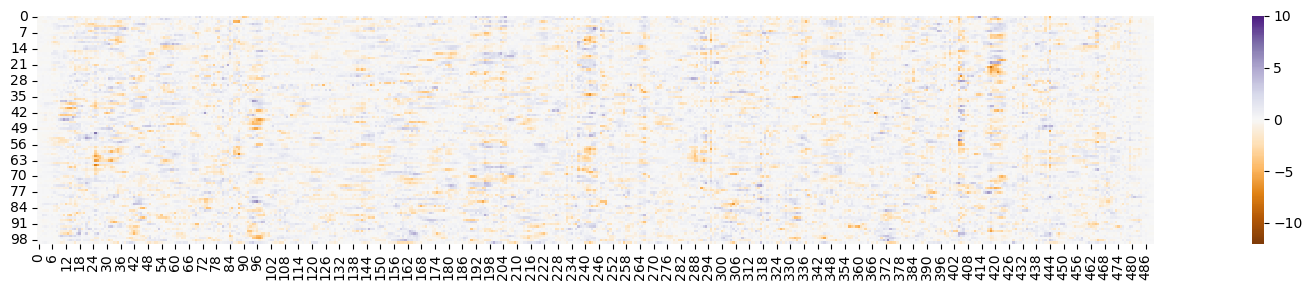

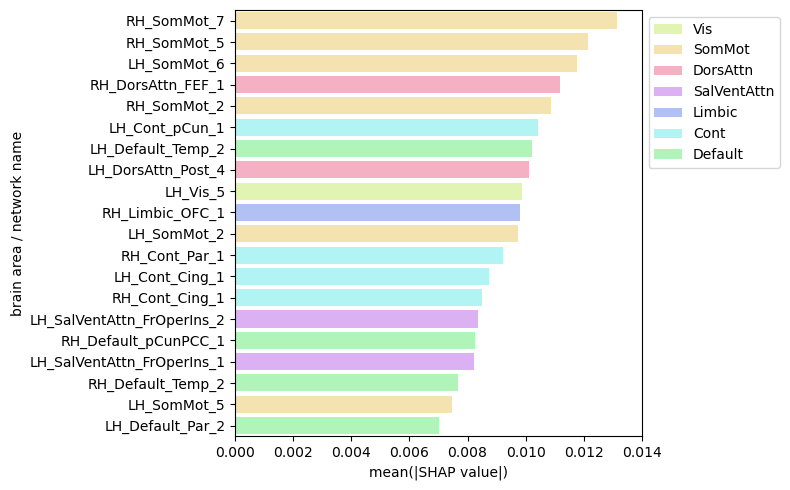

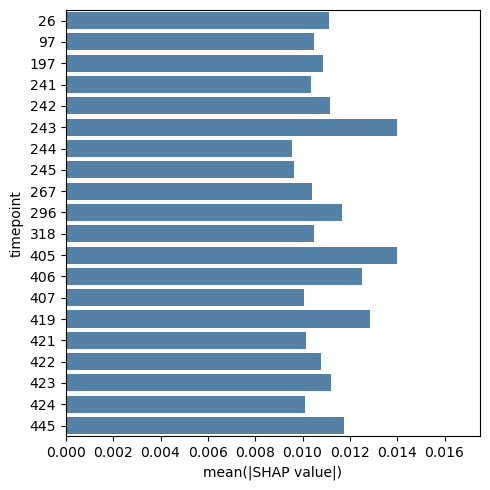

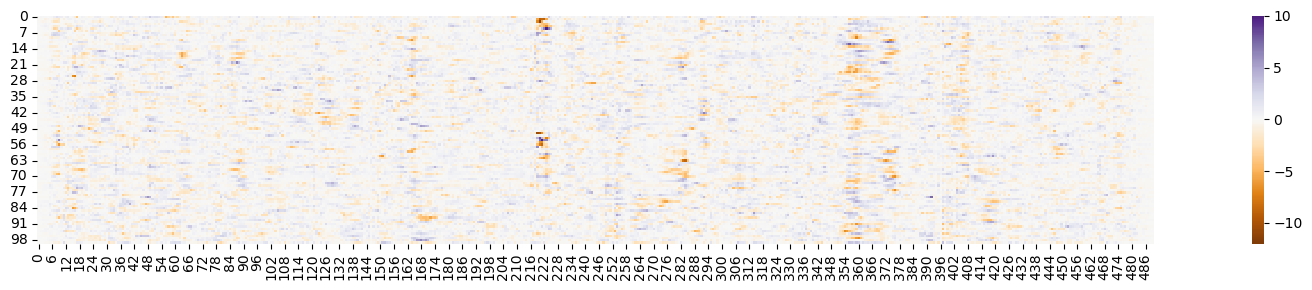

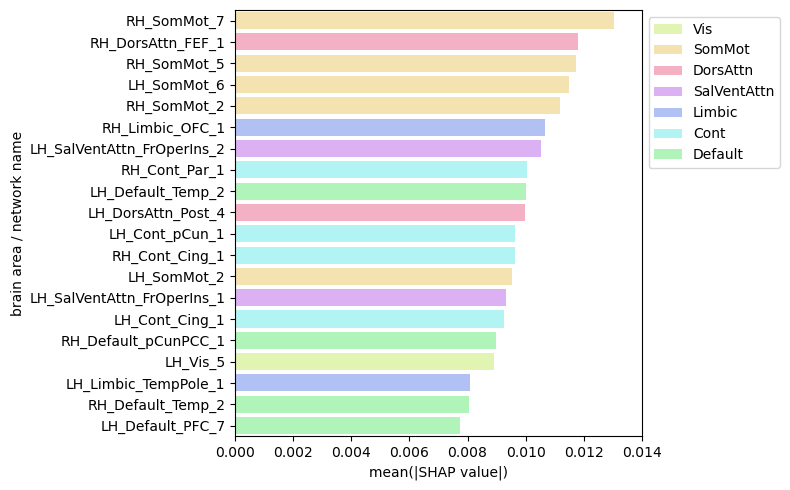

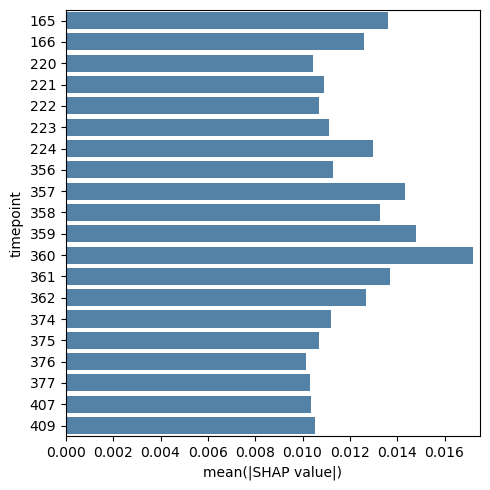

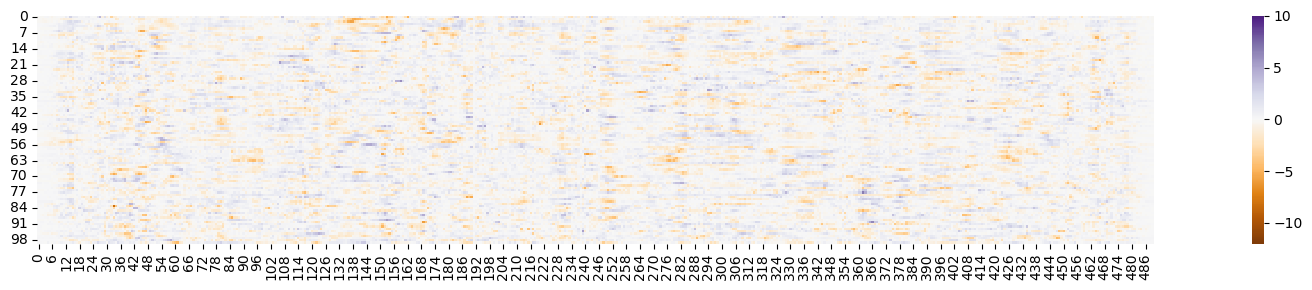

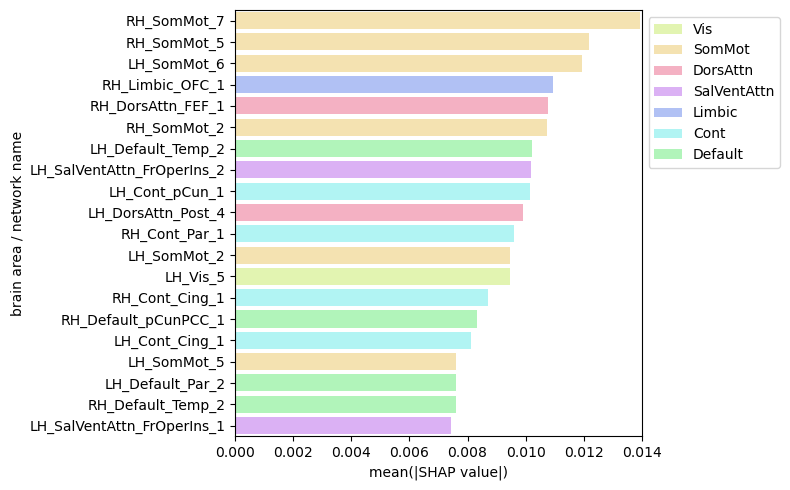

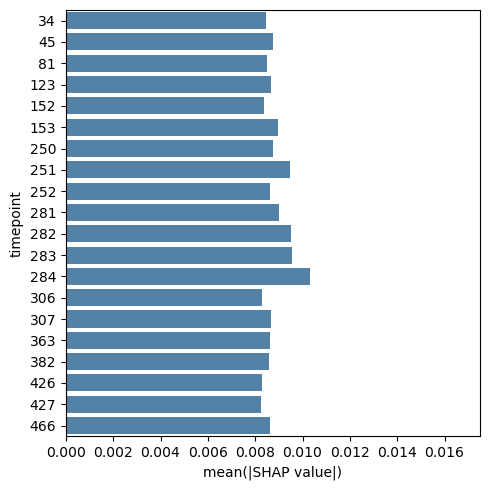

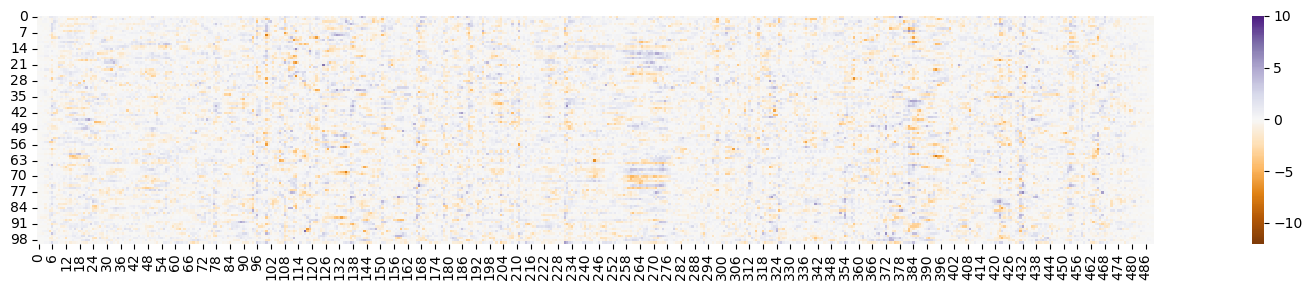

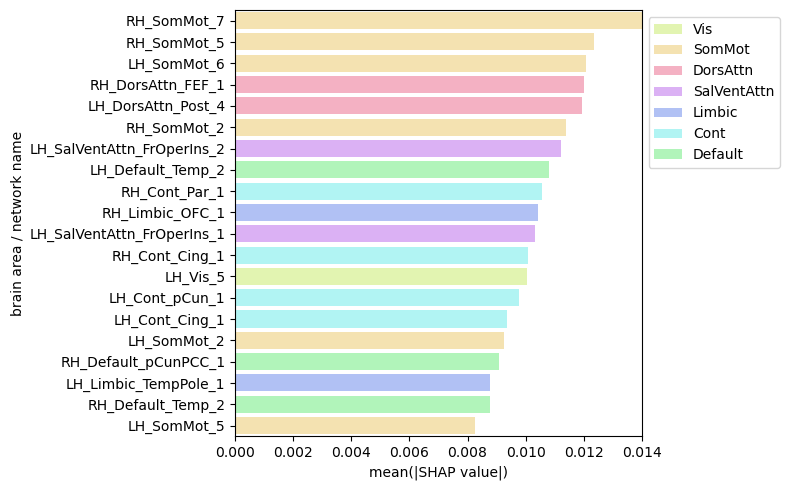

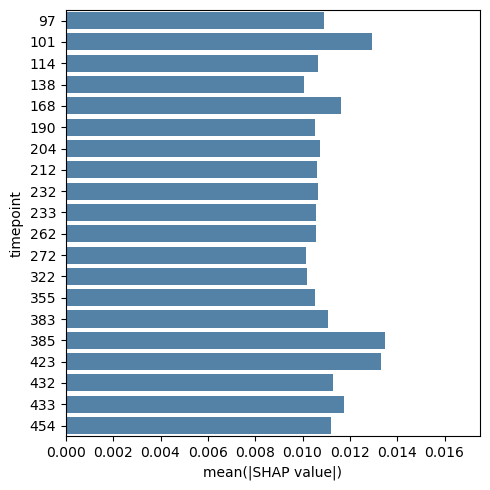

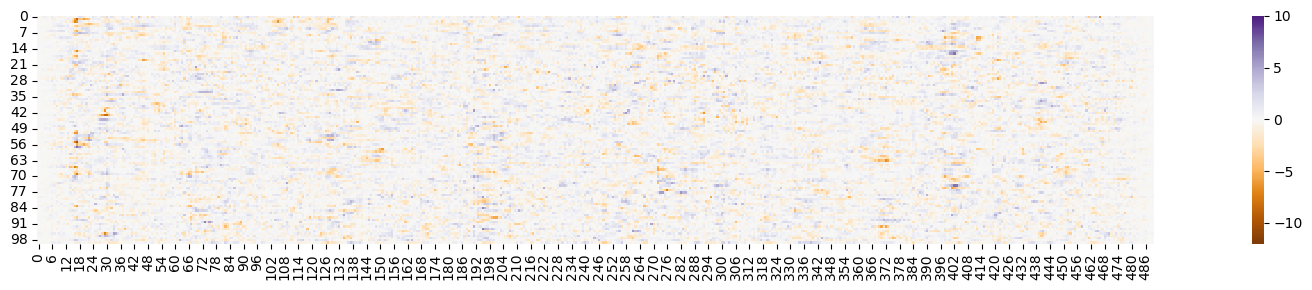

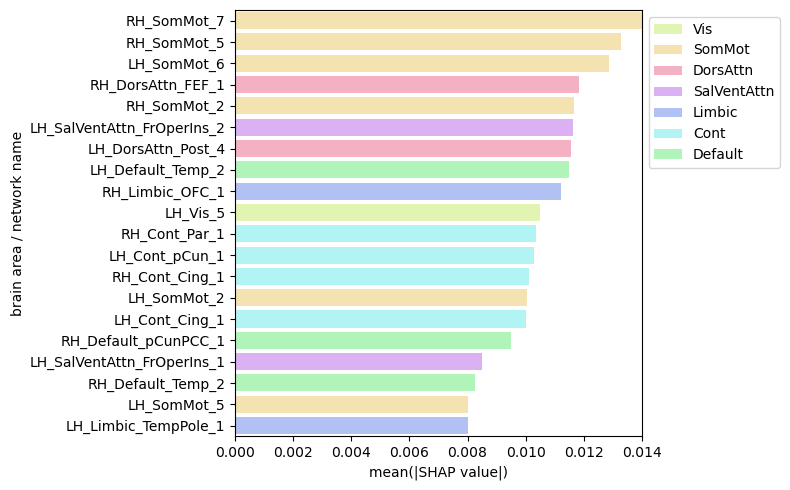

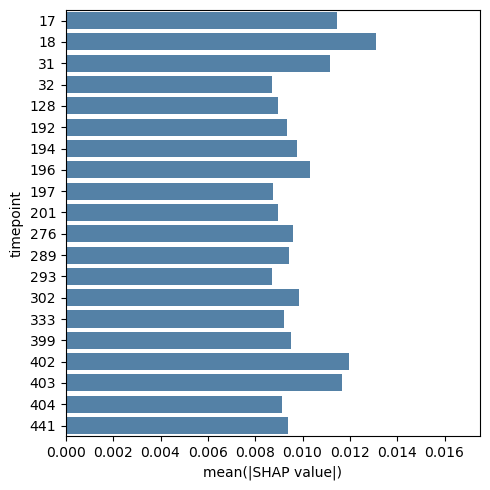

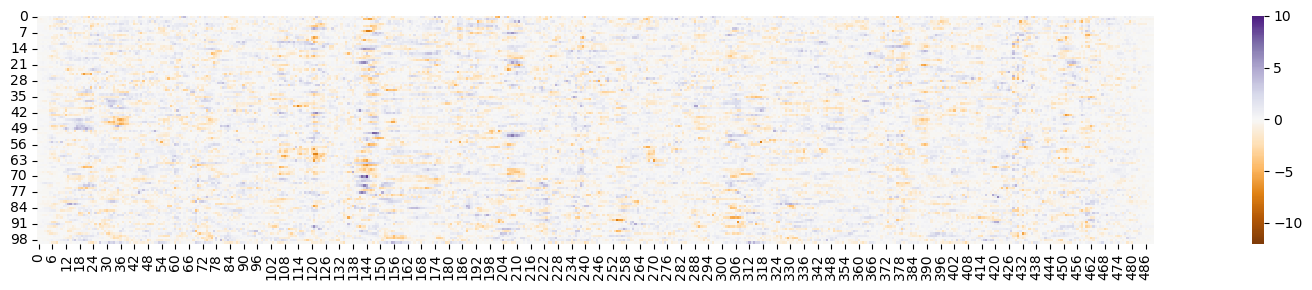

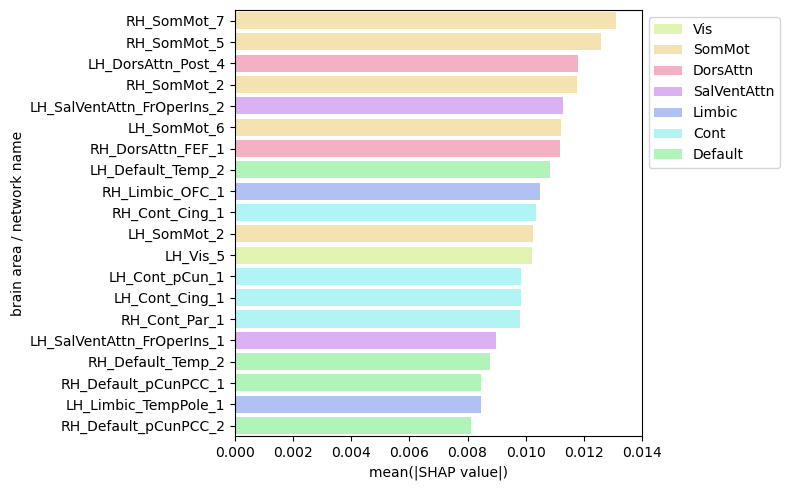

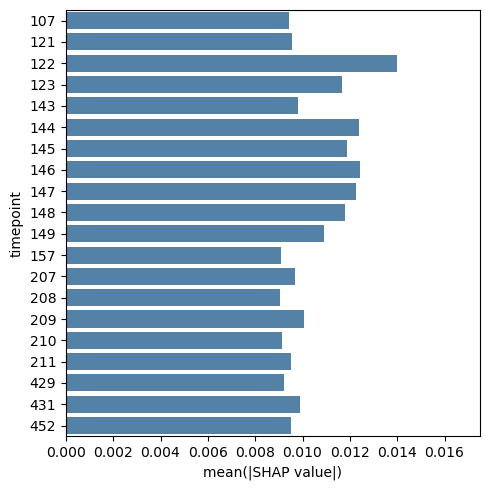

In [11]:
for id in local_sub_ids:
    viz.save_heatmap(shallow_shap,id,save_name='heatmap_'+str(id)+'_shallow.png')
    viz.save_parcel_explanation(shallow_shap, id,
                               save_name=f'parcellation_shap_{id}_shallow.png')
    viz.save_timepoint_explanation(shallow_shap,id,
                               save_name=f'timepoint_shap_{id}_shallow.png')

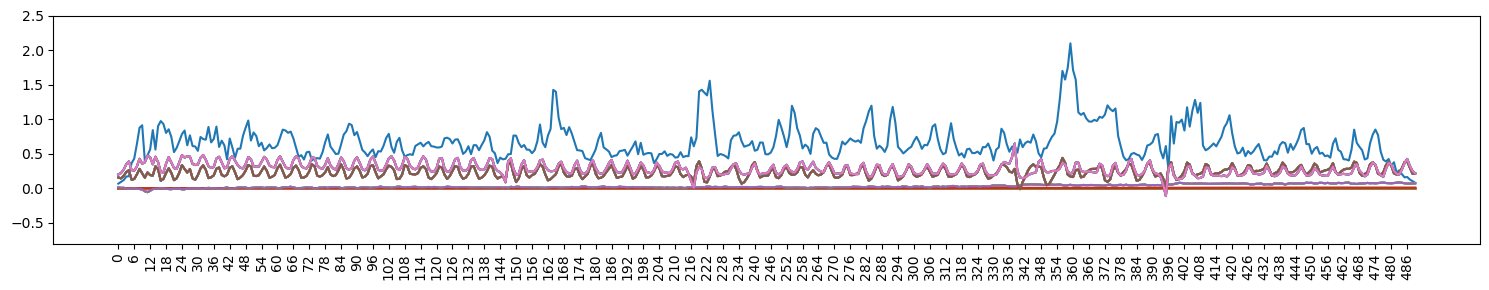

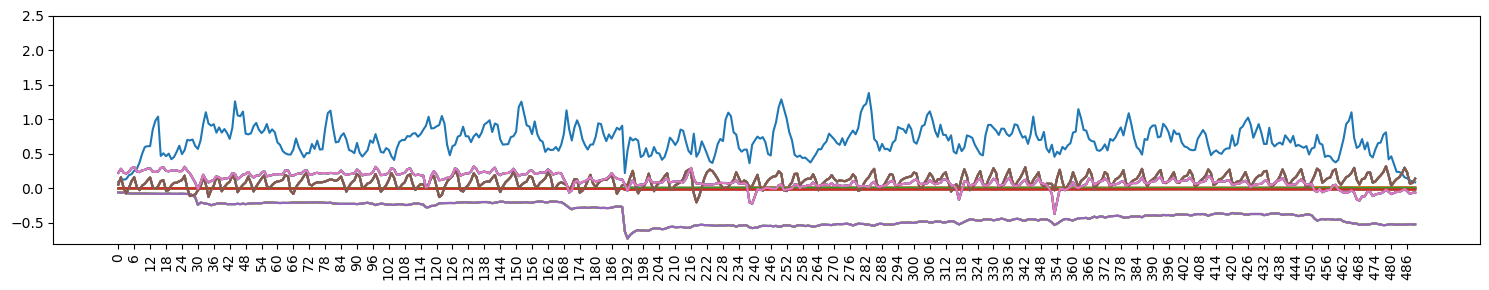

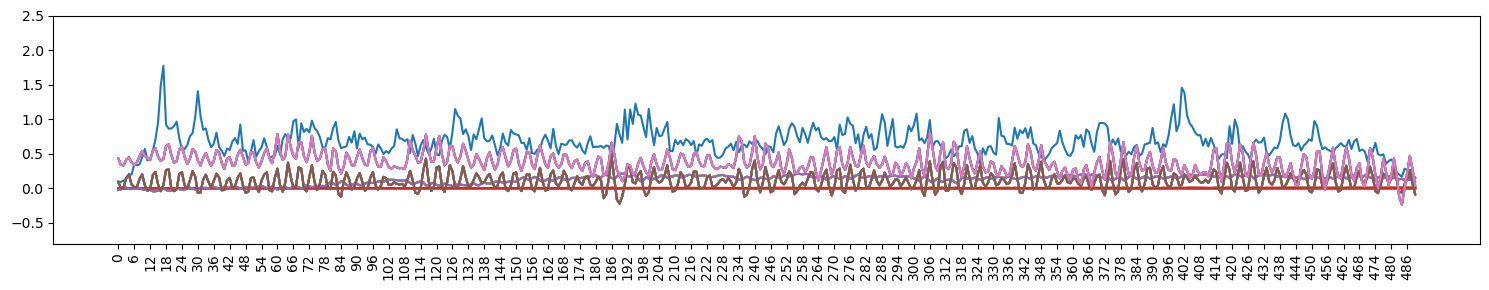

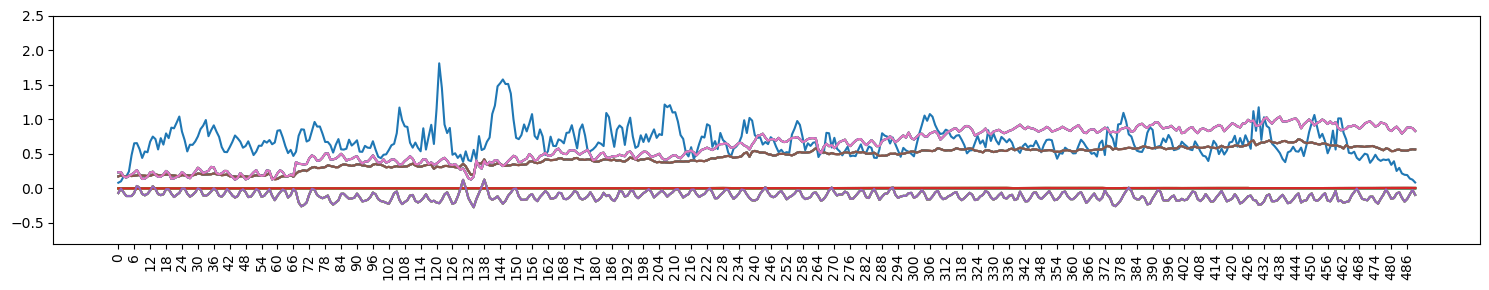

In [14]:
fig_path = '/home/laurar/brain_age_1D-CNN/viz/'
for id in motion_ids:
    mc_path = f'/home/laurar/brain_age_1D-CNN/data/schaefer/mc/prefiltered_func_data_mcf_{str(id)}.par'
    head_motion = np.loadtxt(mc_path)
    sub_array = utils.get_sub_shap(shallow_shap, id)
    fig = plt.figure(figsize=(15,3))
    plt.xticks(range(0,490,6), rotation=90)
    plt.ylim(-0.8,2.5)
    plt.plot(np.mean(np.abs(zscore(sub_array, axis=1)), axis=0))
    for i in range(6):
        plt.plot(head_motion)
    fig.tight_layout()
    fig.savefig(fig_path+'motion_'+str(id)+'_shallow.png')
    fig.show()